## Project: Data Wrangling using Pandas and Regex

In this project you are asked __to implement__ and __perform a unit testing__ for a series of Python functions (Q1-Q13) that are typically required during the ***data wrangling*** phase of the end-to-end data science pipeline. A subset of unit testing functions is provided for you. You are expected to write unit testing for all the remaining functions.

__Data Wrangling consists of the following main steps:__

* Data Acquisition
* Data Cleansing
* Data Understanding: Basics
* Data Manipulation
  
  
__1. Data Acquisition Objectives__

* Question 1: How to import multiples files for storage and access? (store filenames in array)
* Question 2: How to import data in different formats? (read_excel, read_csv)
* Question 2: How are they read into by pandas? (DataFrame)
* Question 4: How to have a peek at the data after import? (head/tail)

__2. Data Cleansing Objectives__

* Question 5: Check attributes of each file
* Question 5: Identify data types
* Question 5: Apply coercion if applicable
* Question 5: Check for NA/missing data
* Question 6: Remove/replace corrupt data
* Question 6: Identify duplicate data
* Question 6: Check for corrupt/incorrect data  

* Check for data consistency (e.g. GPA cannot be less than 0)
* Identifying and removing outliers

__3. Data Understanding Objectives__

* Question 7: Basic Summary Statistics
* Question 9: Dimensionality

__4. Data Manipulation Objectives__

* Question 11: Merge/Concatenate DataFrame
* Question 11: Mapping to create a new attribute
* Question 11: Incorporate the use of multiple functions
* Question 12: Filter to subset the data
* Question 13: Discretize data 
  
  
__Regular Expressions:__ *Regular expressions are used in conjunction with other preprocessing steps for matching/parsing patterns.*

* Questions 2/5/6: Filter to subset the dataUse regular expressions to find/match specific content
* Question 6: Filter to subset the dataString manipulation via. substring and replace methods

## Install Required Packages

If you do not have Anaconda installed, then you may need to install the following packages using the following commands (Note: If you have Anaconda installed, then you already have Pandas and `regex`):

> pip3 install pandas  
  
> pip3 install regex

## INSTRUCTIONS: In all the functions, remove the `pass` statement and write your code.

In [1]:
import pandas as pd
import re
import glob
import copy

%matplotlib inline
import matplotlib.pyplot as plt

### __Question 1: Write a function to import all excel file names into a list.__

_Hint: Use the glob module._

In [2]:
def Q1_function():
    """
    :type : None
    :rtype: List[String]
    """
    # TYPE YOUR CODE HERE    
    nameofiles = []
    location = r'./data_raw'
    nameoffiles = glob.glob(location + r"/*.xlsx")    #return a names of all files
    return nameoffiles    


# Call the function and print the result. This result is used in subsequent questions.
filenames = Q1_function()
print(filenames)

['./data_raw\\Python-QUIZ Coercion (6 min.)-grades.xlsx', './data_raw\\Python-QUIZ Conditionals (6 min.)-grades.xlsx', './data_raw\\Python-QUIZ Dictionaries (10 min.)-grades.xlsx', './data_raw\\Python-QUIZ Exceptions (10 min.)-grades.xlsx', './data_raw\\Python-QUIZ Functions (18 min.)-grades.xlsx', './data_raw\\Python-QUIZ Iterations (6 min.)-grades.xlsx', './data_raw\\Python-QUIZ Lists (10 min.)-grades.xlsx', './data_raw\\Python-QUIZ Sets (7 min)-grades.xlsx', './data_raw\\Python-QUIZ Strings (5 min.)-grades.xlsx', './data_raw\\Python-QUIZ Taxonomy of Python Data Structures (12 min.)-grades.xlsx', './data_raw\\Python-QUIZ Tuples (10 min.)-grades.xlsx']


### __Question 2: Write a function to return the name of the excel file based on a given string. *(The string is defined for you)*__  
*Hints: Use the following.*
* Regex 're.search' function.
* Pandas function 'read_excel'

In [3]:
def Q2_function(files, s):
    """
    :type : List[String], String
    :rtype: String
    """
    # TYPE YOUR CODE HERE
                   
    
    for filename in files:
        if re.search(".*"+s, filename):
            return filename.split("/")[-1].split("\\")[-1]   #used to split and return the name of the file
    
        

# Call the function and print the result. Use this to check the correctness of your code and for debugging.
file = Q2_function(filenames, s = "Dictionaries")
print(file)

Python-QUIZ Dictionaries (10 min.)-grades.xlsx


### __Question 3: Write a function to load the "Functions" excel file into a Pandas DataFrame.__  
*Hint: Remember you have executed functions in Questions 1 and 2. Try using them here. You can save some coding time!*  
* Use the result from Question 1.
* Use the function written in Question 2.
* Use the Pandas function 'read_excel' to import an excel file.

In [4]:
def Q3_function(files, s):
    """
    :type : List[String], String
    :rtype: Pandas DataFrame
    """
    # TYPE YOUR CODE HERE
    
    nameoffile = Q2_function(files, s)
    dataframe = pd.read_excel(r'./data_raw/'+nameoffile)    #reads the excel file into a dataframe
    dataframe = dataframe.drop(columns=['Unnamed: 0'])      #dropping the unnamed column
    return dataframe

# Call the function and print the result. This result is used in subsequent questions.
functions_df = Q3_function(filenames, s = "Functions")
print(functions_df)
# functions_df.head(3)

       State                  Started on                   Completed  \
0   Finished    February 5 2018  3:19 PM    February 5 2018  3:34 PM   
1   Finished    February 4 2018  4:01 PM    February 4 2018  4:19 PM   
2   Finished    February 6 2018  3:57 PM    February 6 2018  4:12 PM   
3   Finished   February 10 2018  4:05 PM   February 10 2018  4:23 PM   
4   Finished    February 4 2018  4:59 PM    February 4 2018  5:16 PM   
5   Finished    February 5 2018  5:20 PM    February 5 2018  5:38 PM   
6   Finished   February 10 2018  9:49 PM  February 10 2018  10:07 PM   
7   Finished    February 5 2018  8:30 PM    February 5 2018  8:48 PM   
8   Finished   February 13 2018  4:17 AM   February 13 2018  4:35 AM   
9   Finished   February 12 2018  2:19 PM   February 12 2018  2:35 PM   
10  Finished  February 13 2018  10:45 AM  February 13 2018  11:03 AM   
11  Finished   February 11 2018  1:48 AM   February 11 2018  2:06 AM   
12  Finished    February 5 2018  5:20 PM    February 5 2018  5:3

In [5]:
def Q4_function(dataframe):
    """
    :type : DataFrame
    :rtype: [String], DataFrame, DataFrame
    """
    columnnames = []
    columnnames = list(dataframe.columns)         #returns the column list in dataframe
    
    data_subset = dataframe.loc[ : , ['id', 'Time taken','Grade/45.00','Q. 1 /5.00','Q. 2 /10.00','Q. 3 /6.00','Q. 4 /6.00','Q. 5 /12.00','Q. 6 /6.00']]
    top10rows = dataframe.head(10)                #returns the top 10 rows
    
    return columnnames,data_subset,top10rows
   


# Call the function and print the results. These results are used in subsequent questions.
names, df_subset, top_10 = Q4_function(functions_df)

print("Column Names")
print(names)
print()
print("Subsetted Data")
print(df_subset)
print()
print("Top 10 Rows")
print(top_10)

Column Names
['State', 'Started on', 'Completed', 'Time taken', 'Grade/45.00', 'Q. 1 /5.00', 'Q. 2 /10.00', 'Q. 3 /6.00', 'Q. 4 /6.00', 'Q. 5 /12.00', 'Q. 6 /6.00', 'id']

Subsetted Data
    id       Time taken  Grade/45.00  Q. 1 /5.00  Q. 2 /10.00  Q. 3 /6.00  \
0    0  14 mins 16 secs           32           5            6           6   
1    1  17 mins 54 secs           31           5            8           6   
2   12  15 mins 44 secs           20           3            4           3   
3    2          18 mins           30           5            6           6   
4    3  17 mins 31 secs           26           5            6           6   
5    4  17 mins 59 secs           25           5            6           6   
6    5          18 mins           24           5            6           6   
7    6          18 mins           23           5            6           0   
8    7    18 mins 1 sec           23           4            4           6   
9    8  16 mins 44 secs           22       

### Question 5: Using the subsetted DataFrame from the previous question, complete the following tasks.

* Identify the data type of every column. Return as a list. *(read about dtypes)*
* Strip all white spaces from the columns. 
    + try using list comprehension along with the 'sub' function in 're' module
* Check if 'Time taken' column has NA or empty values:
    + use `df.isnull().any()`. 
    + If YES, replace with 0: use `df.fillna()`.
* Using `regex` (`re.search`), convert the 'Time taken' column into seconds (int) and store in a new column called 'time' (e.g., convert __2 mins 10 secs__ into __130__. Note that to get 130, you need to do some math. Use coersion to convert str to int.
* Return the DataFrame with 'Time taken' column dropped.

In [6]:
def Q5_function(df):
    
    """
    :type : DataFrame
    :rtype: [String], DataFrame
    """
    # TYPE YOUR CODE HERE
    df1 = df.copy(deep=True)
    column_data_type = []
    for dt in df.dtypes:
        column_data_type.append(dt.name)                                  #return the column datatypes
    for col in df1.columns:
        for r in range(len(df1.index)):
            if isinstance(df1.iloc[r][col] , str):
                df1.at[r,col]=re.sub(r"\s+", "", df1.iloc[r][col])        #strips all white spaces
                
                                     
    if df1['Time taken'].isnull().any():                                  #checks for NA or NUll values
        df1['Time taken'].fillna()                                        #replace with 0   
        

    timelist = []                                                         #changes the timetaken column to time
    for r in df1['Time taken']:      
        mint = re.search(r"\d+m", r)
        sec = re.search(r"\d+s", r)
        time = 0
        if mint:
            time = int(mint.group()[:-1])*60
        if sec:
            time += int(sec.group()[:-1])
        timelist.append(time)
    df1['time'] = timelist
    df1 = df1.drop(['Time taken'], axis = 1)
    return column_data_type,df1
    
    


# Call the function and print the results. These results are used in subsequent questions.
column_types, Q5_df = Q5_function(df_subset)
print("Column Datatypes")
print(column_types)
print()
print("New Update DataFrame")
print(Q5_df)


Column Datatypes
['int64', 'object', 'int64', 'int64', 'int64', 'int64', 'object', 'object', 'object']

New Update DataFrame
    id  Grade/45.00  Q. 1 /5.00  Q. 2 /10.00  Q. 3 /6.00 Q. 4 /6.00  \
0    0           32           5            6           6       3.00   
1    1           31           5            8           6          -   
2   12           20           3            4           3          -   
3    2           30           5            6           6       3.00   
4    3           26           5            6           6       3.00   
5    4           25           5            6           6       6.00   
6    5           24           5            6           6       3.00   
7    6           23           5            6           0       0.00   
8    7           23           4            4           6       3.00   
9    8           22           4            4           6       0.00   
10   9           22           5            8           6       3.00   
11  10           21    

### Question 6: Using the returned DataFrame from the previous question, complete the following tasks.

* Some columns might need to be converted to integer for the subsequent tasks. Identify which columns and convert them to int/float.
* Are there any duplicate rows? Remove them from the DataFrame.
* Data collected might be corrupt. Check whether data is missing or corrupt. Data is missing if there is a '-'. If missing data exists, replace with the mean of other values.
* With the above point in mind, find the mean values of all columns except 'id'. Append these as a row to your dataframe and return

*Hint: Note that the maximum marks for each column is different. Make sure you parse the information from the column name.*

In [7]:
def Q6_function(df):
    
    """
    :type : DataFrame
    :rtype: DataFrame
    """
    # TYPE YOUR CODE HERE
    import numpy
    df1 = df.copy(deep=True)
    df1 = df.drop_duplicates()                      #drops duplicates
    df1 = df1.replace("-",numpy.nan)                #replaces '-' with NAN
    df1 = df1.astype({'Q. 4 /6.00':'float64', 'Q. 5 /12.00':'float64', 'Q. 6 /6.00':'float64'})
    df1 = df1.fillna(df1.mean())                    #fills with means

                  
    meandict = {}
    for col in df1.columns:
        if col != 'id':
            sum = 0
            count = 0
            for r in range(len(df1.index)):
                sum += float(df1.iloc[r][col])
                count += 1
            mean = sum/count                        #calculates mean
            meandict[col] = mean
    df1 = df1.append(meandict,ignore_index=True,sort=False)
    
    return df1

# Call the function and print the results.
Q6_df = Q6_function(Q5_df)
print(Q6_df)

      id  Grade/45.00  Q. 1 /5.00  Q. 2 /10.00  Q. 3 /6.00  Q. 4 /6.00  \
0    0.0    32.000000    5.000000     6.000000    6.000000         3.0   
1    1.0    31.000000    5.000000     8.000000    6.000000         2.0   
2   12.0    20.000000    3.000000     4.000000    3.000000         2.0   
3    2.0    30.000000    5.000000     6.000000    6.000000         3.0   
4    3.0    26.000000    5.000000     6.000000    6.000000         3.0   
5    4.0    25.000000    5.000000     6.000000    6.000000         6.0   
6    5.0    24.000000    5.000000     6.000000    6.000000         3.0   
7    6.0    23.000000    5.000000     6.000000    0.000000         0.0   
8    7.0    23.000000    4.000000     4.000000    6.000000         3.0   
9    8.0    22.000000    4.000000     4.000000    6.000000         0.0   
10   9.0    22.000000    5.000000     8.000000    6.000000         3.0   
11  10.0    21.000000    5.000000    10.000000    6.000000         2.0   
12  11.0    21.000000    4.000000     



### Question 7: Use previously created functions to load the 'Exceptions' dataset as a dataframe

* Calculate the mean of the total grade obtained by the students.
* Calculate the standard deviation of the total grade obtained by the students.
* Calculate Q1,Q2 and Q3 (quantiles) for the total grade.
* Find the maximum and minimum values for the total grade

* Return all values rounded to 2 decimal places

*Hint: Use the df.describe function*

In [8]:
def Q7_function(file):
    """
    :type : String
    :rtype: Float
    """
    # TYPE YOUR CODE HERE
    filenames = Q1_function()
    dataframe = Q3_function(filenames, file)
    mean = dataframe["Grade/21.00"].mean()                          #calculate mean
    std = dataframe["Grade/21.00"].std()                            #caluculate std
    q1 =  dataframe["Grade/21.00"].quantile(.25)                    #calculate 1st quantile
    q2 =  dataframe["Grade/21.00"].quantile(.50)                    #calculate 2nd quantile
    q3 =  dataframe["Grade/21.00"].quantile(.75)                    #calculate 3rd quantile
    maximum = dataframe["Grade/21.00"].max()                        #calculate max
    minimum = dataframe["Grade/21.00"].min()                        #calculate min 
    mean = round(mean,2)                                            #rounding off values
    std = round(std,2)
    q1 = round(q1,2)
    q2 = round(q2,2)
    q3 = round(q3,2)
    maximum = round(maximum,2)
    minimum = round(minimum,2)
    
    return mean,std,q1,q2,q3,maximum,minimum 
    
    

# Call the function and print the results.
mean_,std_,q1,q2,q3,max_,min_ = Q7_function(file="Exceptions")
print("Mean:", mean_)
print("Std. Dev.:", std_)
print("First Quantile", q1)
print("Second Quantile", q2)
print("Third Quantile", q3)
print("Max:", max_)
print("Min:", min_)

Mean: 14.83
Std. Dev.: 2.19
First Quantile 13.46
Second Quantile 14.66
Third Quantile 16.62
Max: 18.5
Min: 10.83


### Question 8: Create a boxplot of the grade distribution in the 'Exceptions' dataset.

* Compare the plot lines to the values calculated in the previous question.
* Use df.plot.box function.

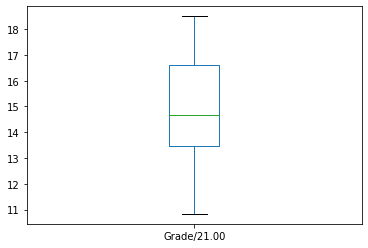

In [9]:
def Q8_function(file):
    
    """
    :type : String
    :rtype: Plot
    """
    
    df = Q3_function(filenames, file)
    Q8_plot = df[['Grade/21.00']].plot.box(return_type='axes')
    
    return Q8_plot


# Call the function. Plot will display.
Q8_function(file='Exceptions')

### Question 9: Return the number of rows and columns present in the 'Strings' dataset

* Use the `df.shape` attribute.

In [10]:
def Q9_function(file):
    
    """
    :type : String
    :rtype: list
    """ 
    # TYPE YOUR CODE HERE
    
    filenames = Q1_function()
    functions_df = Q3_function(filenames, file)
    return list(functions_df.shape)
    
    
         #CHANGE THE QUESTION TO Q3


# Call the function and print the results
rows, columns = Q9_function (file='Strings')
print("Rows:",rows)
print("Columns:",columns)

Rows: 17
Columns: 7


### Question 10: Use the output from Question 5. Group the students based on their score in 'Q. 5 /12.00' column

* Which students scored 0 
* How many students achieved the maximum possible score
* Consider NA/missing values as 0

*Hint : Use groupby function.*


In [11]:
def Q10_function(df):
    
    """
    :type : DataFrame
    :rtype: list, int
    """ 
    # TYPE YOUR CODE HERE
    
    import numpy
    
    df = df.replace("-",numpy.nan)                                      #replace '-' with nan
    df = df.astype({'Q. 5 /12.00':'float64'})                           #convert to float
    df = df.fillna(0)                                                   #fill with 0
    
    newgroup = df.groupby('Q. 5 /12.00')                                #group by 'Q. 5 /12.00'
    newgroupframe = newgroup.get_group(0.00)                            #get 0 values
    newgroupframe = newgroupframe['id']                                 #get id of 0 values 
    newgrouplist = list(newgroupframe)                                  #convert to list
                       
    maximum = 0.00
    count = 0
    for col in df.columns:
        if col in ['Q. 5 /12.00']:
            for r in range(len(df.index)):
                if float(df.iloc[r][col]) > maximum: 
                    maximum = float(df.iloc[r][col])                   # caluculate maximum value  
            for r in range(len(df.index)):
                if float(df.iloc[r][col]) == maximum:
                    count += 1                                         #calculate count of max values
                    
    return newgrouplist,count


# Call the function and print the results
zero, maximum = Q10_function(Q5_df)
print("Students scoring zero :",zero)
print("Number of students with maximum score :",maximum)

Students scoring zero : [9, 10, 13, 17, 18]
Number of students with maximum score : 2


### Question 11: Find out who ('id') has scored the maximum combined score in the 'Tuples' and 'Taxonomy' quiz.

* Use the `pd.merge()` function.
* Call the function you wrote for Question 5 to convert time and remove spaces in columns (will be used in later questions).
* Create a new column 'Total_score' which is the sum of the scores of the two quizzes.

In [12]:
def Q11_function():
    
    """
    :type : None
    :rtype: Dataframe, int
    """ 
    # TYPE YOUR CODE HERE
    
    filenames = Q1_function()
    dataframe1 = Q3_function(filenames, "Taxonomy")                         #getting dataframe taxonomy
    colum, dataframe1 = Q5_function(dataframe1)
    filenames = Q1_function()
    dataframe2 = Q3_function(filenames, "Tuples")                           #getting dataframe tuples
    colum, dataframe2 = Q5_function(dataframe2)
    dataframe3=dataframe1.merge(dataframe2, how = "inner", on = "id")       #merging the two data frames on inner join for id
    
    dataframe3['Total_Score'] = dataframe3['Grade/21.00'] + dataframe3['Grade/20.00']
    maxscorer = []
    maximum = 0.00
    count = 0
    for col in dataframe3.columns:
        if col in ['Total_Score']:
            for r in range(len(dataframe3.index)):
                if float(dataframe3.iloc[r][col]) > maximum:
                    maximum = float(dataframe3.iloc[r][col])                #calculating maximum value
            for r in range(len(dataframe3.index)):
                if float(dataframe3.iloc[r][col]) == maximum:
                    maxscorer.append(dataframe3.loc[r]['id'])               #getting maxscorer id
    return dataframe3,maxscorer[0]             
# Call the function and print the results. The DataFrame will be used in subsequent questions
Q11_df,max_scorer = Q11_function()
print("Max scorer :",max_scorer)

Max scorer : 10


### Question 12: Use the DataFrame generated in Question 11 and return the list of ids whose total time for both quizzes is less than than 20 minutes.

* Sort the list before returning.
* Can you code it in one line?

In [13]:
def Q12_function(df):
    
    """
    :type : DataFrame
    :rtype: list(int)
    """ 
    # TYPE YOUR CODE HERE
    id_list = [ df.loc[r]['id'] for r in range(len(df.index)) if df.iloc[r]['time_x'] + df.iloc[r]['time_y'] < 1200]  #selectin id of student in particular range
    id_list.sort()
    return id_list

# Call the function and print the results.
ids = Q12_function(Q11_df)
print("ID of students :",ids)

ID of students : [3, 4, 7, 8, 12, 18]


### Question 13: Discretize the column 'Grade/45.00' for the DataFrame generated in Question 6 and create a new column. Find the number of people (id) per bin. Return a DataFrame with only the bins and count per bin.

*Hints:* 
* _Use 'cut' and 'groupby'._
* _Include the overall average in the groupings._
* _You won't need to use 'drop' to drop columns. Use groupby and check the result._
* _Use 5 bins_
* Don't consider 'Overall Average' row.

In [14]:
def Q13_function(df):
    
    """
    :type : DataFrame
    :rtype: DataFrame
    """    
    # TYPE YOUR CODE HERE
    grades = [10, 20, 30, 40, 45]                                          
    df['bin'] = pd.cut(df['Grade/45.00'], 5)
    df_new = df[:-1]
    df_new = df_new.groupby(['bin']).count()
    dfn = pd.DataFrame(df_new.iloc[:,0])
    dfn = dfn.rename(columns={'id':'count'})
    return dfn


# Call the function and print the results.
Q13_df = Q13_function(Q6_df)
print(Q13_df)

                count
bin                  
(12.981, 16.8]      4
(16.8, 20.6]        3
(20.6, 24.4]        7
(24.4, 28.2]        2
(28.2, 32.0]        3


### INSTRUCTIONS: Complete unit testing for the remaining functions to check correctness of your code.

In [1]:
import unittest

class TestNotebook(unittest.TestCase):


    def test_001_finction(self):
        
        ans = ['Python-QUIZ Coercion (6 min.)-grades.xlsx', 'Python-QUIZ Conditionals (6 min.)-grades.xlsx', 'Python-QUIZ Dictionaries (10 min.)-grades.xlsx', 'Python-QUIZ Exceptions (10 min.)-grades.xlsx', 'Python-QUIZ Functions (18 min.)-grades.xlsx', 'Python-QUIZ Iterations (6 min.)-grades.xlsx', 'Python-QUIZ Lists (10 min.)-grades.xlsx', 'Python-QUIZ Sets (7 min)-grades.xlsx', 'Python-QUIZ Strings (5 min.)-grades.xlsx', 'Python-QUIZ Taxonomy of Python Data Structures (12 min.)-grades.xlsx', 'Python-QUIZ Tuples (10 min.)-grades.xlsx']
        filenames = []
        result = []
        result = Q1_function()
        
        for word in result: 
            word = word.split("/")[-1].split("\\")[-1]
            filenames.append(word)      
        
        self.assertEqual(ans,filenames)
        
    def test_Q02_function(self):
        
        ans='Python-QUIZ Lists (10 min.)-grades.xlsx'
        
        result=Q2_function(filenames, s = "Lists")
        
        #Handling removal of the path to check only filename
        self.assertEqual(ans,result)
        
    def test_Q03_function(self):  
        ans = ['State','Started on','Completed','Time taken','Grade/45.00','Q. 1 /5.00','Q. 2 /10.00','Q. 3 /6.00','Q. 4 /6.00','Q. 5 /12.00','Q. 6 /6.00','id']
        filenames = Q1_function()
        answer = Q3_function(filenames, s = "Functions")
        self.assertEqual(ans,list(answer))
        
    def test_Q04_function(self):
        
        cols_ans=['State', 'Started on', 'Completed', 'Time taken', 'Grade/45.00', 'Q. 1 /5.00', 'Q. 2 /10.00', 'Q. 3 /6.00', 'Q. 4 /6.00', 'Q. 5 /12.00', 'Q. 6 /6.00',  'id']
        subset_cols_ans= ["id", "Time taken", "Grade/45.00", "Q. 1 /5.00", "Q. 2 /10.00", "Q. 3 /6.00", "Q. 4 /6.00", "Q. 5 /12.00", "Q. 6 /6.00"]
        top_ans=10
        
        cols_result,subset_result,top_result=Q4_function(functions_df)

        self.assertEqual(cols_ans,list(cols_result))
        self.assertEqual(subset_cols_ans,list(subset_result.columns))
        self.assertEqual(top_ans,len(top_result))
        
    def test_Q05_function(self):
        ansdtype = ['int64','object','int64','int64','int64','int64','object','object','object']
        cols_ans= ["id", "Grade/45.00", "Q. 1 /5.00", "Q. 2 /10.00", "Q. 3 /6.00", "Q. 4 /6.00", "Q. 5 /12.00", "Q. 6 /6.00", 'time']
        types_columns, df_Q5 = Q5_function(df_subset)
        
        resultdtype = []
        for r in types_columns:
            resultdtype.append(str(r))
            
        self.assertEqual(ansdtype,resultdtype)  
        self.assertEqual(cols_ans,list(df_Q5.columns)) 
        
    def test_Q06_function(self):    
        q6columnans= ['id','Grade/45.00','Q. 1 /5.00','Q. 2 /10.00','Q. 3 /6.00','Q. 4 /6.00','Q. 5 /12.00','Q. 6 /6.00','time']
        ansshape = (20,9)
        Q6_dfth = Q6_function(Q5_df)
        self.assertEqual(q6columnans,list(Q6_dfth.columns))
        self.assertEqual(ansshape,Q6_dfth.shape)
        
        
    def test_Q07_function(self):
        
        ans=(14.83,2.19,13.46,14.66,16.62,18.5,10.83) 
        result=Q7_function(file="Exceptions")
        self.assertEqual(ans, result)

    def test_Q09_function(self):   
        ansrowscols = [17,7]
        result = Q9_function (file='Strings')
        self.assertEqual(ansrowscols,result)
        
    def test_Q10_function(self):
    
        students0ans = [9, 10, 13, 17, 18]
        maxscorecountans = 2
        zerostuds, maximums = Q10_function(Q5_df)
        self.assertEqual(zerostuds,students0ans)
        self.assertEqual(maximums,maxscorecountans)
        
    def test_Q11_function(self):
        
        maxscorerans = 10
        Q11_dfff,max_scorerval = Q11_function()
        self.assertEqual(maxscorerans,max_scorerval)
        
    def test_Q12_function(self):
        ans=[3, 4, 7, 8, 12, 18]   
        result=Q12_function(Q11_df)
        self.assertEqual(ans, result)
        
    def test_Q13_function(self):
        ans = [[15, 16, 17, 18], [12, 13, 14], [5, 6, 7, 8, 9, 10, 11], [3, 4], [0, 1, 2]]
        temp = Q13_function(Q6_df)
        result = temp['count'].tolist()
        
        for x in range(len(ans)):
            self.assertEqual(result[x], len(ans[x]))

        
unittest.main(argv=[''], verbosity=2, exit=False)

test_001_finction (__main__.TestNotebook) ... ERROR
test_Q02_function (__main__.TestNotebook) ... ERROR
test_Q03_function (__main__.TestNotebook) ... ERROR
test_Q04_function (__main__.TestNotebook) ... ERROR
test_Q05_function (__main__.TestNotebook) ... ERROR
test_Q06_function (__main__.TestNotebook) ... ERROR
test_Q07_function (__main__.TestNotebook) ... ERROR
test_Q09_function (__main__.TestNotebook) ... ERROR
test_Q10_function (__main__.TestNotebook) ... ERROR
test_Q11_function (__main__.TestNotebook) ... ERROR
test_Q12_function (__main__.TestNotebook) ... ERROR
test_Q13_function (__main__.TestNotebook) ... ERROR

ERROR: test_001_finction (__main__.TestNotebook)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-1-a65c884a9ec3>", line 11, in test_001_finction
    result = Q1_function()
NameError: name 'Q1_function' is not defined

ERROR: test_Q02_function (__main__.TestNotebook)
---------------------------